<Figure size 640x480 with 0 Axes>

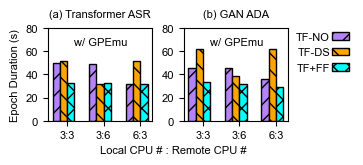

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()

columns = ['ratio', 'TF-NO', 'TF-DS', 'FastFlow']

# ssd, 24 workers, 8 v100
df = pd.read_csv('ff-transformer.dat', sep='\t', names=columns)

transformer_tf_values = df['TF-NO'].tolist()
transformer_ds_values = df['TF-DS'].tolist()
transformer_ff_values = df['FastFlow'].tolist()
transformer_ratios = df['ratio'].tolist()

# ssd, 24 workers, 8 v100
df = pd.read_csv('ff-gan.dat', sep='\t', names=columns)

gan_tf_values = df['TF-NO'].tolist()
gan_ds_values = df['TF-DS'].tolist()
gan_ff_values = df['FastFlow'].tolist()
gan_ratios = df['ratio'].tolist()

num_subcategories = 3
bar_width = 0.2
index = np.arange(len(gan_ratios))

plt.figure(figsize=(3.1,1.2))

plt.subplot(1,2,1)
plt.bar(index + 0 * bar_width, transformer_tf_values, bar_width, label='TF-NO', color='#B682F8', hatch="//", edgecolor="black")
plt.bar(index + 1* bar_width, transformer_ds_values, bar_width, label='TF-DS', color='orange', hatch="\\\\", edgecolor="black")
plt.bar(index + 2 * bar_width, transformer_ff_values, bar_width, color='cyan', label="TF+FF", hatch="xx", edgecolor="black")
plt.xticks(index + (bar_width * num_subcategories) / 2, transformer_ratios, fontsize=fontsize)
plt.yticks(range(0,100,20), fontsize=fontsize)
plt.title('(a) Transformer ASR',fontsize=fontsize, pad=8)
plt.annotate('Local CPU # : Remote CPU #', xy=(0.3, -0.5), xytext=(0.5, -0.35),fontsize=fontsize, xycoords='axes fraction')
plt.legend(loc="upper center", bbox_to_anchor=(2.63, 1.07), ncol=1, markerfirst=False, columnspacing=0.5, handlelength=1.5, handletextpad=0.2, frameon=False)
plt.ylabel('Epoch Duration (s)', fontsize=fontsize)
plt.annotate("w/ GPEmu", xy=(0.5, 65), xytext=(0.5, 65))

plt.subplot(1,2,2)
plt.bar(index, gan_tf_values, bar_width, label='TF-NO', color='#B682F8', hatch="//", edgecolor="black")
plt.bar(index + 1* bar_width, gan_ds_values, bar_width, label='TF-DS', color='orange', hatch="\\\\", edgecolor="black")
plt.bar(index + 2 * bar_width, gan_ff_values, bar_width, color='cyan', label="TF + FF", hatch="xx", edgecolor="black")
plt.xticks(index + (bar_width * num_subcategories) / 2, gan_ratios, fontsize=fontsize)
plt.yticks(range(0,100,20), fontsize=fontsize)
plt.title('(b) GAN ADA',fontsize=fontsize, pad=8)
plt.annotate("w/ GPEmu", xy=(0.5, 65), xytext=(0.5, 65))

plt.subplots_adjust(wspace=0.3)
plt.savefig('ff-transformer-gan.eps',  bbox_inches='tight')